# Integrating the HFM library into pyKasso #
C. Fandel 2020 <br>
Purpose: replace the skfmm module with the agd-hfm module to improve network generation capability

TO-DO:

*Prioritize*
- [X] enable use of isotropic agd algorithm
- [X] remove old/duplicate skfmm functions
- [X] add get/set/update functions
- [ ] rename X,Y indices to ix,iy to reduce confusion with grid
- [X] review simple show functions (show nodes/links, add map legend)
- [ ] allow iteration over multiple outlets
    - [ ] CURRENTLY HERE - need to revisit network construction to make sure that multiple connected outlets are supported
- [ ] allow assigning specific inlets to specific outlets
- [X] add options in settings file to shuffle inlets and/or shuffle outlets
- [X] change DEM input file for orientations to be a map of the contact elevation, not the land surface
- [X] test valley1 with fractures
- [X] test valley1 with isotropic fm
- [X] test with polygon
- [X] test inlets and outlets with composite and generate settings
- [ ] test valley1 with vertical slice & water table
- [X] test betteraz with Riemann
- [X] test Gottesacker 2D
- [ ] update process diagram


*Useful (save for later)*
- [ ] import GSLIB file in old format for backwards compatibility
- [ ] import orientations from GSLIB file (calculate from potential?)
- [ ] add a grid function to convert indices to coordinates and vice-versa (use same as hfm built-in?)

### Setup & imports ###
Need to import a local version of pykasso be able to make and test changes.
Use one of the two methods below (but not both).
Question: Is one way better than the other in some way?

In [18]:
method = 2

#Method 1: using importlib
if method==1:
    import importlib.util
    spec = importlib.util.spec_from_file_location('pykasso', 'C:/Users/Chloe/Documents/GitHub/pyKasso/pykasso/base.py')
    pk = importlib.util.module_from_spec(spec)
    spec.loader.exec_module(pk)

#Method 2: setting the path variable to the path to the local version 
#This version allows reloading the module to see changes
if method==2:
    import sys
    sys.path.append('C:/Users/Chloe/Documents/GitHub/pyKasso/pykasso') #path to local version of package
    import base as pk  #in this case, "base" is the name of the .py file with all of the pykasso functions in it

#Check that it worked:
#catchment = pk.SKS() #create a simple model
#You should see a printed statement indicating that you are using a development version of the package.
#If you do not see this statement, you are using the main version, and changes you make to the local version will have no effect.

In [19]:
#Import the rest of the modules needed:
import os            
import sys           
import importlib
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import karstnet as kn

#all fast-marching-related imports
import agd
from agd import Eikonal
from agd.Metrics import Riemann
#from agd.Plotting import quiver
#from agd import LinearParallel as lp
#from agd import AutomaticDifferentiation as ad
#norm_infinity = ad.Optimization.norm_infinity

#Local modules:
import importlib.util
spec = importlib.util.spec_from_file_location('swmmpy', 'C:/Users/Chloe/Documents/GitHub/gottesacker/swmmpy.py')
sp = importlib.util.module_from_spec(spec)
spec.loader.exec_module(sp)

#os.chdir('C:\\Users\\Chloe\\Documents\\GitHub\\pyKasso')
os.getcwd()

'C:\\Users\\Chloe\\Documents\\GitHub\\pyKasso\\notebooks'

### Test on built-in Betteraz system ###

CAUTION: You are using the development version of this package.


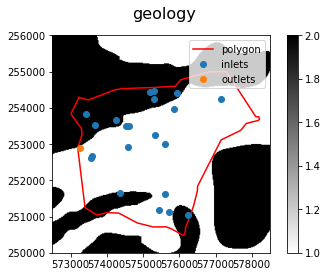

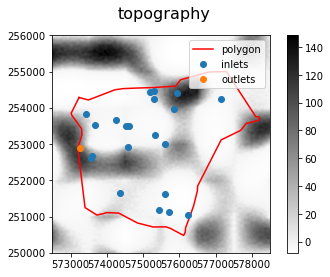

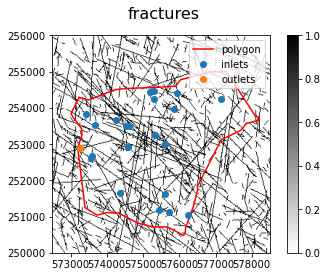

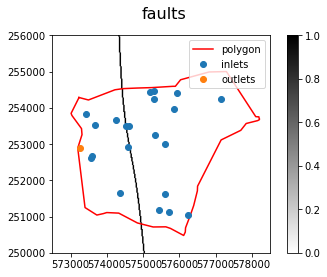


 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


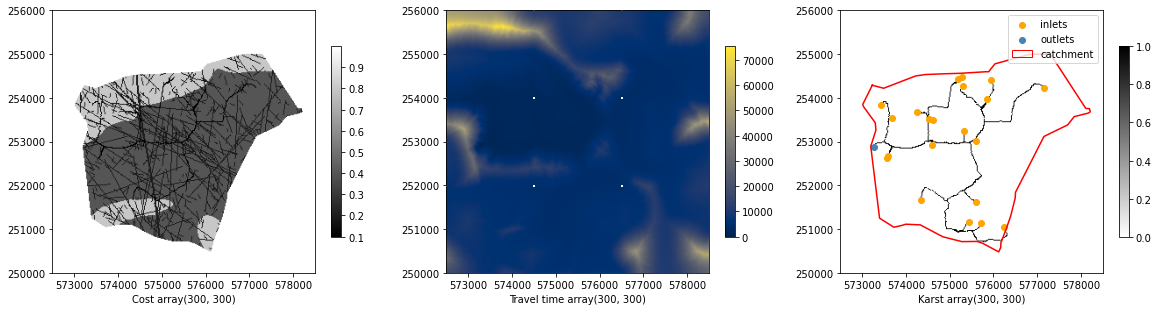

In [520]:
importlib.reload(pk)

catchment = pk.SKS('inputs/betteraz/betteraz_cas_1.yaml')
#catchment = pk.SKS() #test default
catchment.show_catchment(data='geology')
catchment.show_catchment(data='topography')
catchment.show_catchment(data='fractures')
catchment.show_catchment(data='faults')
catchment.compute_karst_network()
catchment.show()

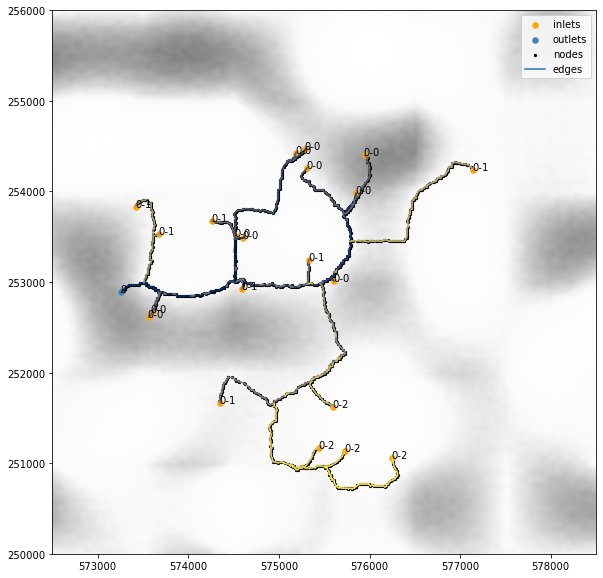

In [521]:
f,ax = plt.subplots(1,1, figsize=(10,10))
ax.imshow(catchment.geology.data['topography']['data'], origin='lower', extent=catchment.grid.extent, cmap='gray_r', alpha=0.5)
catchment.show_network(ax=ax)

### Simple one-valley system ###

CAUTION: You are using the development version of this package.


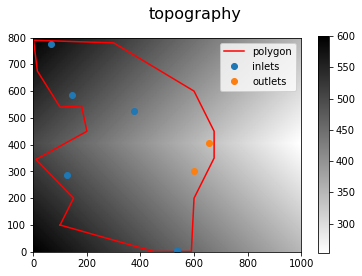


 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


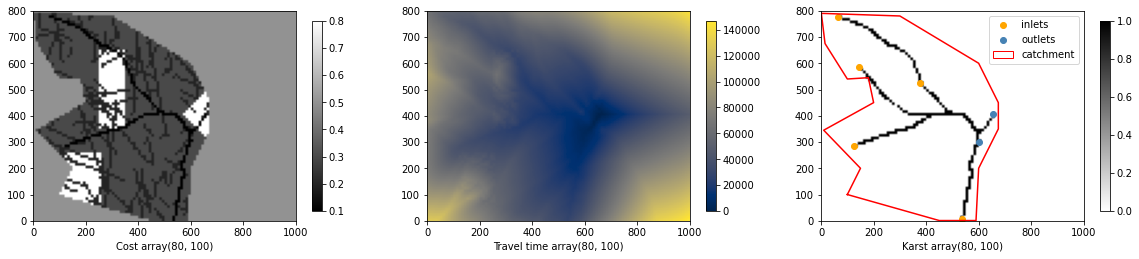

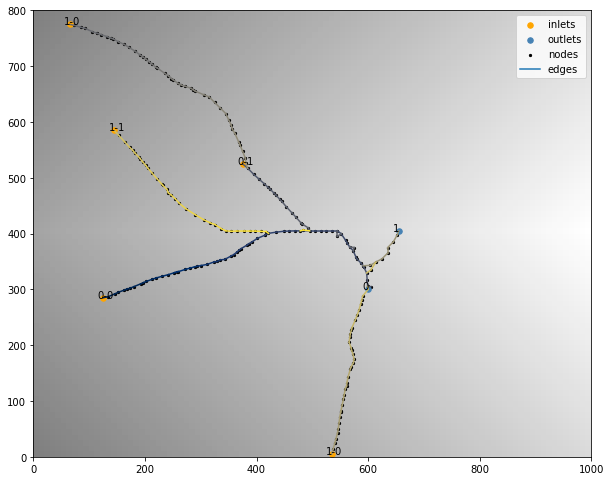

In [525]:
importlib.reload(pk)

catchment = pk.SKS('inputs/valley1/settings.yaml') #import settings and options from input folder
catchment.show_catchment(data='topography')
catchment.compute_karst_network()
catchment.show()

f,ax = plt.subplots(1,1, figsize=(10,10))
ax.imshow(catchment.geology.data['topography']['data'], origin='lower', extent=catchment.grid.extent, cmap='gray_r', alpha=0.5)
catchment.show_network(ax=ax)

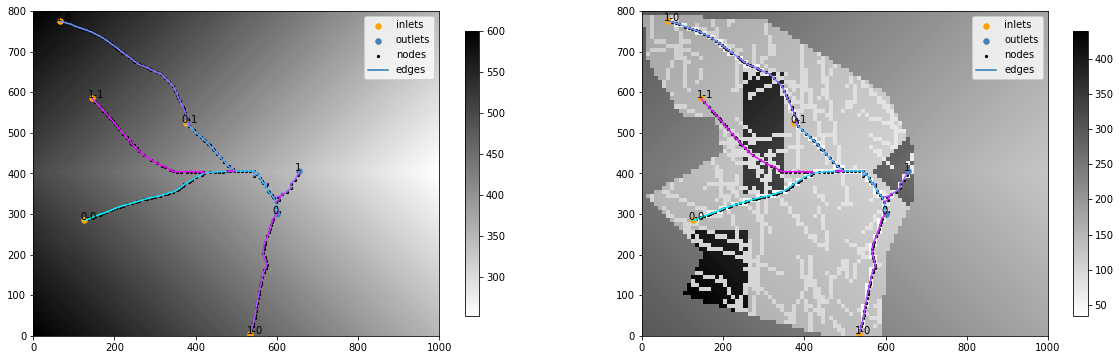

In [526]:
f,ax = plt.subplots(1,2, figsize=(20,15))
m = catchment.geology.data['topography']['data']
im = ax[0].imshow(m, origin='lower', extent=catchment.grid.extent, cmap='gray_r')
plt.colorbar(im, ax=ax[0], shrink=0.35)
im = ax[1].imshow(catchment.maps['alpha'][-1], origin='lower', extent=catchment.grid.extent, cmap='gray_r')
plt.colorbar(im, ax=ax[1], shrink=0.35)
catchment.show_network(ax=ax[0], cmap='cool')
catchment.show_network(ax=ax[1], cmap='cool')

### Run on Gottesacker 2D ###

CAUTION: You are using the development version of this package.


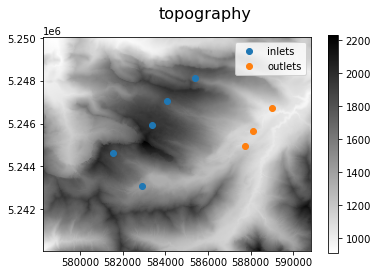

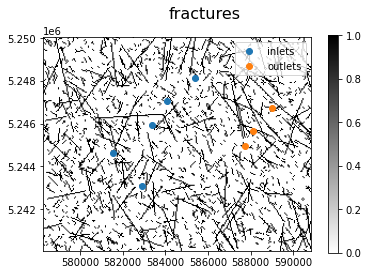


 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


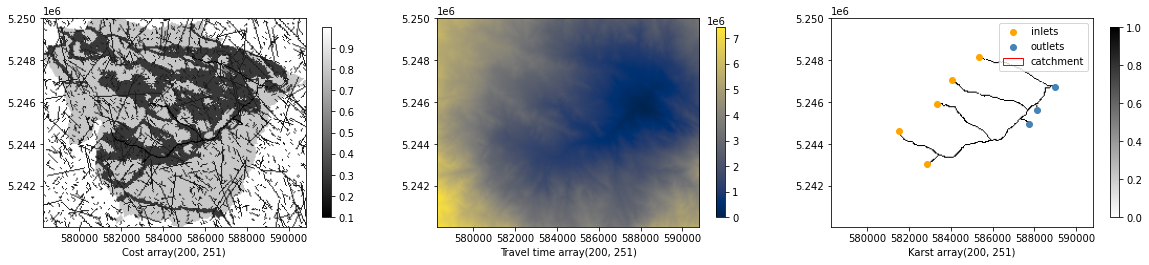

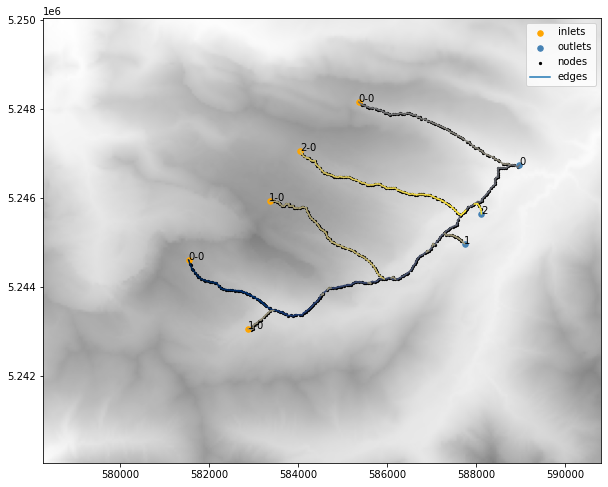

In [550]:
importlib.reload(pk)

catchment = pk.SKS('inputs/gottesacker/settings.yaml') #import settings and options from input folder
catchment.show_catchment(data='topography')
catchment.show_catchment(data='fractures')
catchment.compute_karst_network()
catchment.show()

f,ax = plt.subplots(1,1, figsize=(10,10))
ax.imshow(catchment.geology.data['topography']['data'], origin='lower', extent=catchment.grid.extent, cmap='gray_r', alpha=0.5)
catchment.show_network(ax=ax)

In [551]:
catchment.inlets

,x,y,outlet,outletx,outlety,inlet_iteration,iteration
0,581536.59,5244599.62,0.0,588979.50,5246730.86,0,0.0
1,585367.03,5248151.77,0.0,588979.50,5246730.86,0,0.0
2,582880.85,5243055.12,1.0,587747.52,5244963.63,0,1.0
3,583363.18,5245917.93,1.0,587747.52,5244963.63,0,1.0
4,584054.44,5247056.64,2.0,588123.61,5245638.24,0,2.0


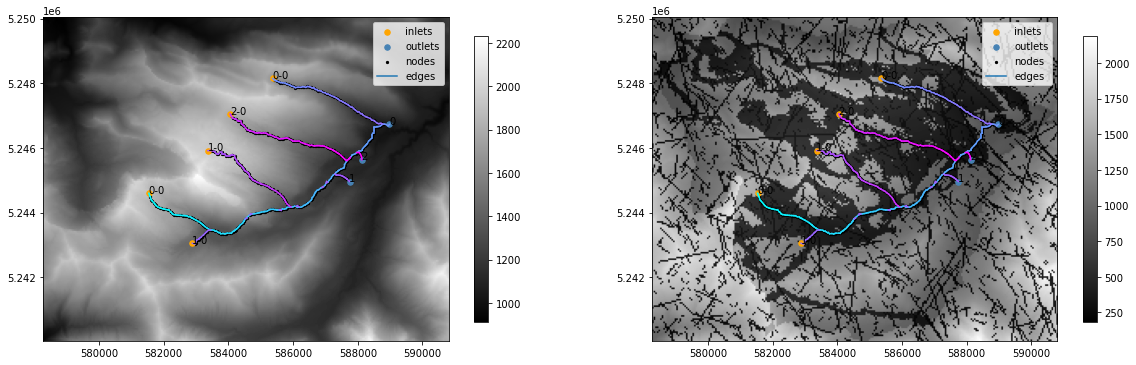

In [611]:
f,ax = plt.subplots(1,2, figsize=(20,15))
m = catchment.geology.data['topography']['data']
im = ax[0].imshow(m, origin='lower', extent=catchment.grid.extent, cmap='gray')
plt.colorbar(im, ax=ax[0], shrink=0.35)
im = ax[1].imshow(catchment.maps['alpha'][0], origin='lower', extent=catchment.grid.extent, cmap='gray')
plt.colorbar(im, ax=ax[1], shrink=0.35)
catchment.show_network(ax=ax[0], cmap='cool')
catchment.show_network(ax=ax[1], cmap='cool')

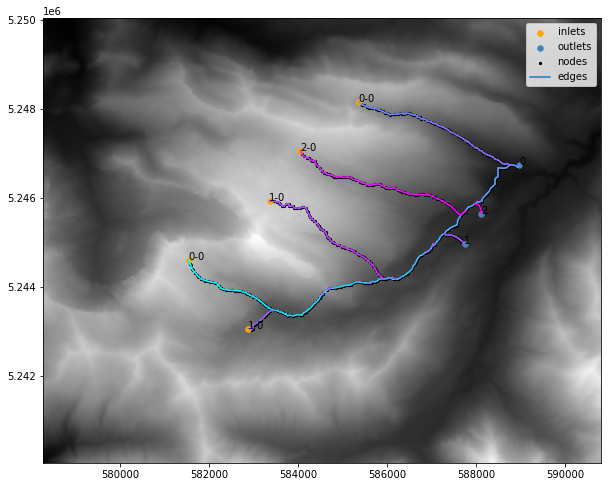

In [612]:
import matplotlib
fig,ax = plt.subplots(figsize=(10,10))
ax.imshow(catchment.get_topography(), origin='lower', extent=catchment.grid.extent, cmap='gray')
ax.set_aspect('equal')
simplify = False
labels = ['inlets','outlets']
data = catchment.karst_simulations[-1]
if simplify == True:
    nodes = data.network['nodes']   #get all nodes
    nodes_simple = data.network['karstnet'].graph_simpl.nodes  #get indices of only the nodes in the simplified graph
    nodes_simple = {key: nodes[key] for key in nodes_simple}   #make dic of only the nodes in the simplified graph
    nodes = pd.DataFrame.from_dict(nodes_simple, orient='index', columns=['x','y','type']) #convert to pandas for easier plotting
    edges = data.network['edges']   #get all edges
    edges_simple = np.asarray(data.network['karstnet'].graph_simpl.edges)  #get indices of only the nodes in the simplified graph
    edges_simple = {key: edge for key,edge in enumerate(edges_simple)}   #make df of only the nodes in the simplified graph, for p
    edges = pd.DataFrame.from_dict(edges_simple, orient='index', columns=['inNode','outNode'])
else:
    nodes = pd.DataFrame.from_dict(data.network['nodes'], orient='index', columns=['x','y','type']) #convert to pandas for easier plotting
    edges = pd.DataFrame.from_dict(data.network['edges'], orient='index', columns=['inNode','outNode']) 

#Set up data for plotting:
fromX = nodes.x.loc[edges.inNode]      #calculate coordinates for link start and end points
fromY = nodes.y.loc[edges.inNode]
toX   = nodes.x.loc[edges.outNode]
toY   = nodes.y.loc[edges.outNode]

#Plot nodes and edges:
n = ax.scatter(nodes.y,                     nodes.x,                     c='k',         s=5)  #scatterplot nodes
i = ax.scatter(data.points['inlets'].x,  data.points['inlets'].y,  c='orange',    s=30) #scatterplot inlets
o = ax.scatter(data.points['outlets'].x, data.points['outlets'].y, c='steelblue', s=30) #scatterplot outlets
e = matplotlib.lines.Line2D([0],[0])                                                  #line artist for legend 
for ind in edges.index:                                                               #loop over edge indices
    ax.plot((fromY.iloc[ind], toY.iloc[ind]), (fromX.iloc[ind], toX.iloc[ind]), c=plt.cm.get_cmap('cool')(ind/len(edges)))  #plot each edge, moving along color gradient to show order

#Add labels:
if 'nodes' in labels:                                         #label node indices
    for ind in nodes.index:                                   #loop over node indices
        ax.annotate(str(ind), xy=(nodes.y[ind]-10, nodes.x[ind]))  #annotate slightly to left of each node
if 'edges' in labels:                                         
    for ind in edges.index:                                   
        ax.annotate(str(ind), xy=(edges.y[ind]-10, edges.x[ind]))  #annotate slightly to left of each edge
if 'inlets' in labels:                                        
    for index,inlet in data.points['inlets'].iterrows(): 
        ax.annotate(str(int(inlet.outlet))+'-'+str(int(inlet.inlet_iteration)),  xy=(inlet.x-10,  inlet.y)) 
if 'outlets' in labels:                                       
    for index,outlet in data.points['outlets'].iterrows():                     
        ax.annotate(str(int(outlet.name)), xy=(outlet.x-10, outlet.y)) 

#Add legend & title:
ax.legend([i,o,n,e],['inlets','outlets','nodes','edges'])



In [602]:
edges = data.network['edges']   #get all edges
edges_simple = np.asarray(data.network['karstnet'].graph_simpl.edges)  #get indices of only the nodes in the simplified graph
edges_simple = {key: edge for key,edge in enumerate(edges_simple)}   #make df of only the nodes in the simplified graph, for p
edges = pd.DataFrame.from_dict(edges_simple, orient='index', columns=['inNode','outNode'])
edges

,inNode,outNode
0,0,48
1,48,79
2,48,260
3,79,80
4,79,274
5,80,274
6,80,81
7,81,82
8,81,275
9,82,275


In [589]:
edges

{0: [0, 1],
 1: [1, 2],
 2: [2, 3],
 3: [3, 4],
 4: [4, 5],
 5: [5, 6],
 6: [6, 7],
 7: [7, 8],
 8: [8, 9],
 9: [9, 10],
 10: [10, 11],
 11: [11, 12],
 12: [12, 13],
 13: [13, 14],
 14: [14, 15],
 15: [15, 16],
 16: [16, 17],
 17: [17, 18],
 18: [18, 19],
 19: [19, 20],
 20: [20, 21],
 21: [21, 22],
 22: [22, 23],
 23: [23, 24],
 24: [24, 25],
 25: [25, 26],
 26: [26, 27],
 27: [27, 28],
 28: [28, 29],
 29: [29, 30],
 30: [30, 31],
 31: [31, 32],
 32: [32, 33],
 33: [33, 34],
 34: [34, 35],
 35: [35, 36],
 36: [36, 37],
 37: [37, 38],
 38: [38, 39],
 39: [39, 40],
 40: [40, 41],
 41: [41, 42],
 42: [42, 43],
 43: [43, 44],
 44: [44, 45],
 45: [45, 46],
 46: [46, 47],
 47: [47, 48],
 48: [48, 49],
 49: [49, 50],
 50: [50, 51],
 51: [51, 52],
 52: [52, 53],
 53: [53, 54],
 54: [54, 55],
 55: [55, 56],
 56: [56, 57],
 57: [57, 58],
 58: [58, 59],
 59: [59, 60],
 60: [60, 61],
 61: [61, 62],
 62: [62, 63],
 63: [63, 64],
 64: [64, 65],
 65: [65, 66],
 66: [66, 67],
 67: [67, 68],
 68: [68,

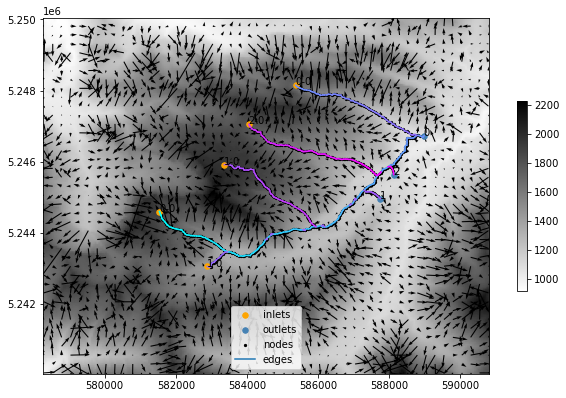

In [555]:
f,ax = plt.subplots(1,1, figsize=(10,10))
m = catchment.geology.data['topography']['data']
im = ax.imshow(m, origin='lower', extent=catchment.grid.extent, cmap='gray_r')
plt.colorbar(im, ax=ax, shrink=0.35)
skip=(slice(None,None,5),slice(None,None,5))
plt.quiver(catchment.grid.X[skip], catchment.grid.Y[skip], 
           catchment.geology.data['orientationy']['data'][skip], catchment.geology.data['orientationx']['data'][skip], scale=20)
catchment.show_network(ax=ax, cmap='cool')

### Inputs/outputs for fast-marching ###

For agd-hfm: <br>
```
hfmIn = Eikonal.dictIn({
    'model':             'Riemann3', #three-dimensional Riemannian eikonal equation (for 2D: Riemann2, for isotropic: Isotropic2 or 3)
    'order':              2,         #recommended setting: 2
    'exportValues':       1,         #output travel time field
    'exportGeodesicFlow': 1          #output walker paths
})
hfmIn.SetRect(sides=[[xmin,xmax],[ymin,ymax],[zmin,zmax]],dims=[xres,yres,zres])
for seed in springs:
    hfmIn['seed'] = seed
    for tip in tips:
        hfmIn['tips'] = [tip]
        hfmIn['metric']    =  F
        hfmOut = hfmIn.Run()
        paths = hfmOut['geodesics']
``` 
       
- seed - coordinates of travel time=0 location, i.e. the spring the conduits are traveling to (array of [x y z])
- tips - coordinates of starting points for walkers, i.e. the inlets (array of [[x1 y1 z1] [x2 y2 z2]]
- metric - travel cost through each cell, i.e. the inverse of the velocity (array of cost values, higher=slower to travel through). If using anisotropic FM, this will include travel cost both parallel and perpendicular to the cell's gradient.
    - to calculate travel cost metric, need:
        - DxV,DyV,DzV: x and y components of gradient in each cell of array, calculate from DEM or from geologic model orientations in each cell (arrays of dim (xres,yres)).
        - alpha: travel cost in same direction as gradient (array of dim (xres,yres) of values between 0 and 1, higher=slower)
        - beta: travel cost perpendicular to gradient (same format as alpha)
- model - which fast-marching algorithm to use (string, either Riemann2, Riemann3, Isotropic2, Isotropic3).

